In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [13]:
ref = pd.read_excel("etwas.xlsx")
ref = ref.astype('str')
cols = ref.columns[3:]
for col in cols:
    if not ref[col].dtype == 'float64':
        ref[col] = ref[col].str.removeprefix('<')
ref.replace("NR", None, inplace = True)

ref.iloc[:, 2:] = ref.iloc[:, 2:].astype('float32')
ref['Tissue'].replace('WM', 'MT', inplace = True)
ref['Tissue'].replace('L', 'Liver', inplace = True)
ref.drop(columns=['Ag'], inplace=True)
cols = ref.columns.to_list()
cols[3:] = ["Arsenic", "Cadmium", "Chromium", "Copper", "Mercury", "Zinc", "Sodium"]
ref.columns = cols
ref

,Fish,Tissue,Moisture,Arsenic,Cadmium,Chromium,Copper,Mercury,Zinc,Sodium
0,"MacDonald, 1997",MT,78.800003,0.92,0.05,0.122,0.256,0.575,2.76,NaN
1,"MacDonald, 1997",Liver,68.0,1.56,1.09,0.696,26.9,1.37,41.5,NaN
2,"MacDonald, 1997",MT,78.400002,0.88,0.44,0.125,0.376,1.42,3.09,NaN
3,"MacDonald, 1997",Liver,66.199997,1.2,0.3,0.545,7.21,1.24,18.1,NaN
4,"MacDonald, 1997",MT,78.400002,0.88,0.4,0.102,0.244,0.18,3.33,NaN
5,"MacDonald, 1997",Liver,63.200001,1.44,0.34,0.338,24.700001,0.16,47.400002,NaN
6,"MacDonald, 1997",MT,NaN,NaN,NaN,NaN,NaN,0.27,NaN,NaN
7,"MacDonald, 1997",MT,68.800003,NaN,NaN,NaN,NaN,0.83,NaN,NaN
8,"MacDonald, 1997",Liver,45.900002,NaN,NaN,NaN,NaN,0.44,NaN,NaN
9,"Webb, 2006",MT,50.0,NaN,NaN,NaN,NaN,0.17,NaN,NaN


In [14]:
data = pd.read_excel("matlab_XLR.xlsx", sheet_name="Results Summary")
vn = data.columns
lt_track = np.zeros(data.shape, dtype = "bool")
for i in np.arange(3, len(vn)):
    lt_track[:, i] = ~(data[vn[i]].str.removeprefix("<") == data[vn[i]])
    temp = data[vn[i]].str.removeprefix("<")
    data[vn[i]] = temp
    
data.head()

,Analyte,Lowest\nDetection Limit,Units,White Sturgeon (WS #1) MT,White Sturgeon (WS #2) MT,White Sturgeon (WS #3) MT,White Sturgeon (WS #4) MT,White Sturgeon (WS #5) MT,White Sturgeon (WS #7) MT,White Sturgeon (WS #10) MT,White Sturgeon (WS #11) MT,White Sturgeon (WS #13) MT,White Sturgeon (WS #1) Liver,White Sturgeon (WS #2) Liver,White Sturgeon (WS #4) Liver,White Sturgeon (WS #5) Liver,White Sturgeon (WS #7) Liver,White Sturgeon (WS #10) Liver,White Sturgeon (WS #11) Liver,White Sturgeon (WS #13) Liver
0,Moisture,0.500,%,73.0,70.7,66.0,72.8,74.9,72.9,77.5,72.7,77.7,58.2,50.1,69.8,62.5,57.2,55.6,63.3,75.4
1,Aluminum,2.000,mg/kg,10.0,18.0,2.0,37.0,2.0,2.8,2.4,2.5,4.4,7.2,3.7,9.7,3.8,9.4,9.8,7.9,26.4
2,Aluminum,0.400,mg/kg wwt,2.71,5.28,0.42,10.1,0.49,0.77,0.54,0.69,0.98,3.03,1.86,2.94,1.42,4.03,4.33,2.89,6.52
3,Antimony,0.010,mg/kg,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.023
4,Antimony,0.002,mg/kg wwt,0.0020,0.0022,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0021,0.0029,0.0024,0.0020,0.0037,0.0057


/var/folders/v1/cgxs0rj57wgfdxxy2t8h47700000gn/T/ipykernel_7851/3091903939.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ticklabel = ticklabel.str.replace(')','')


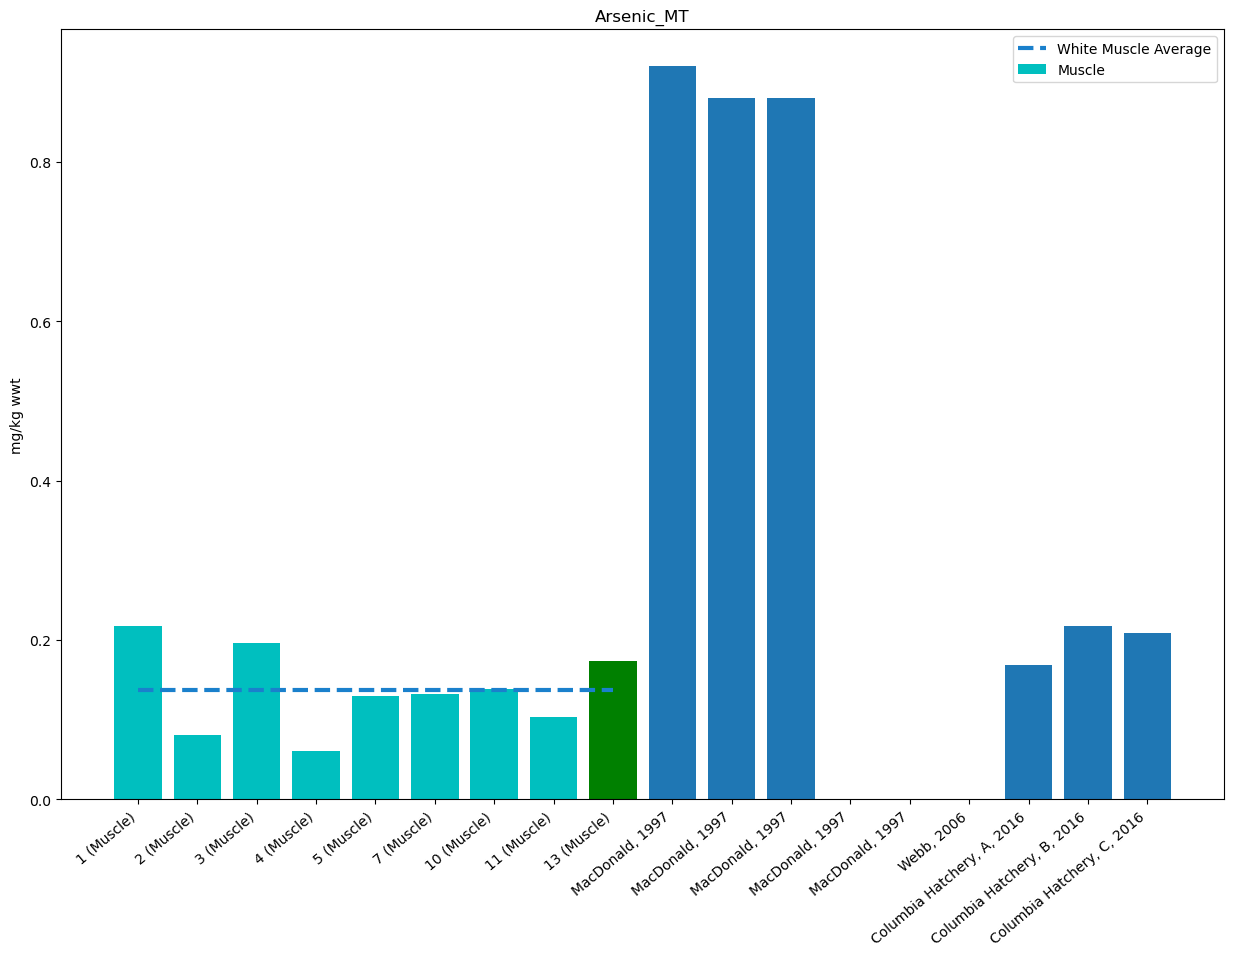

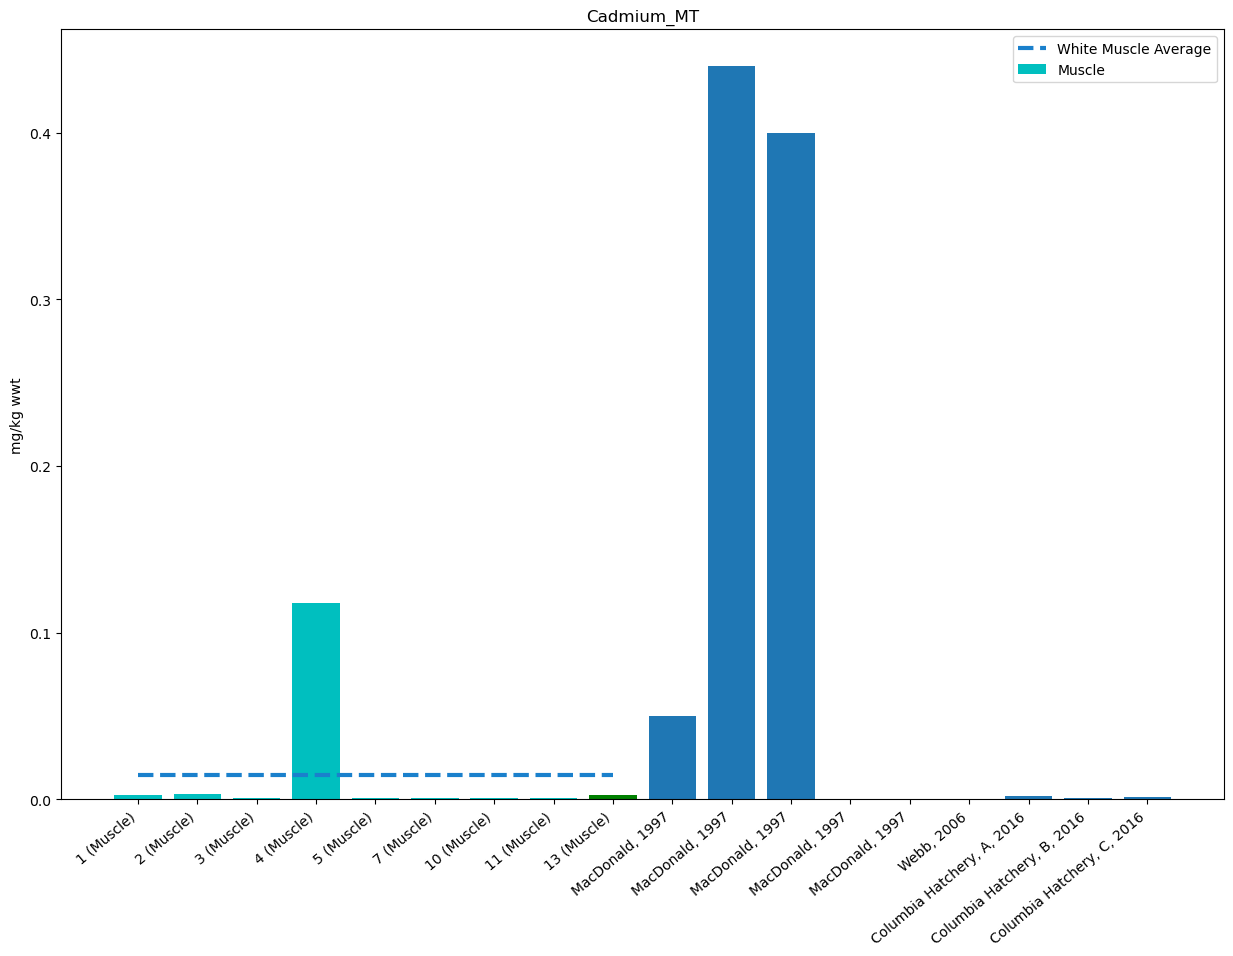

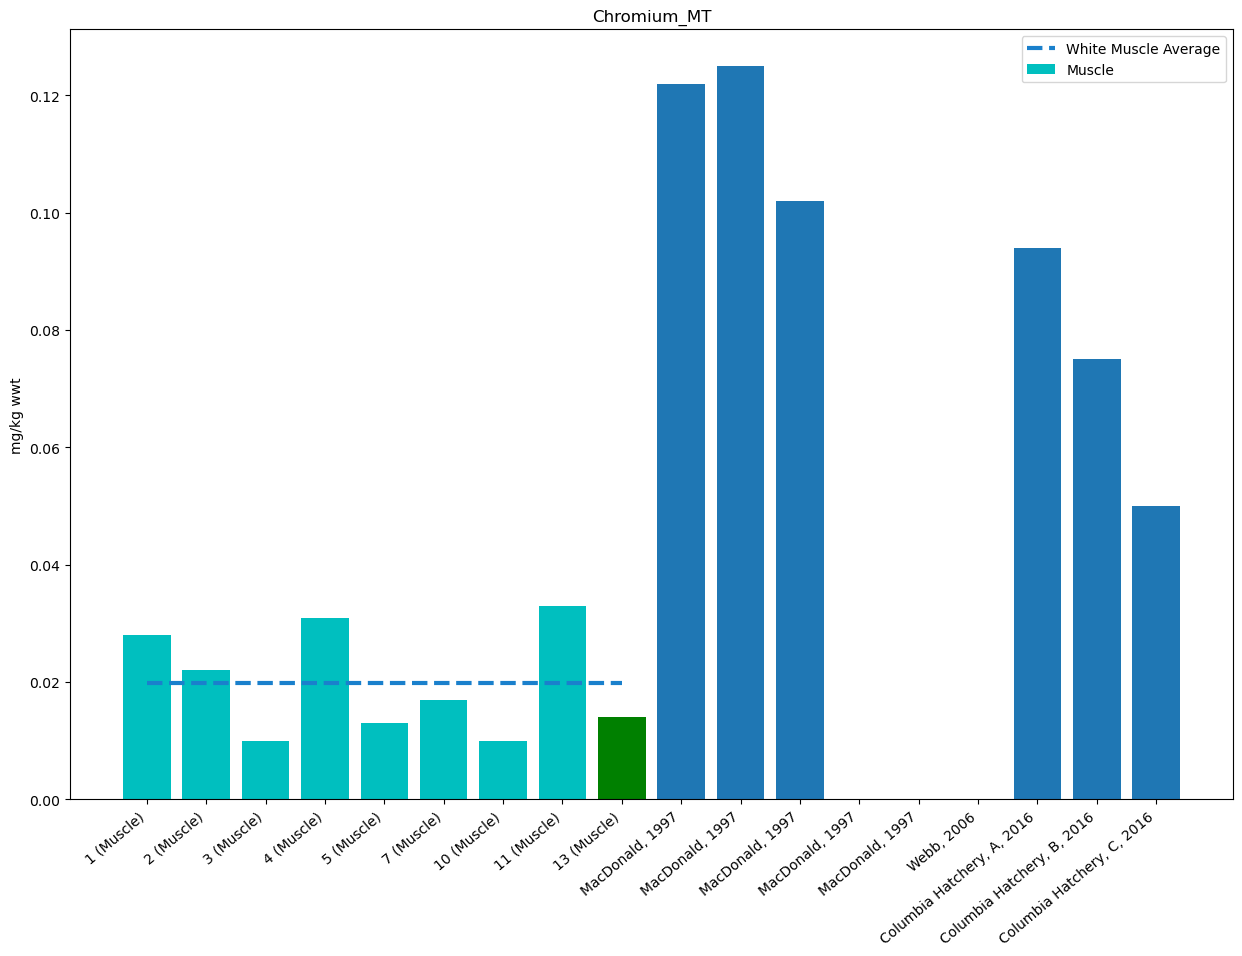

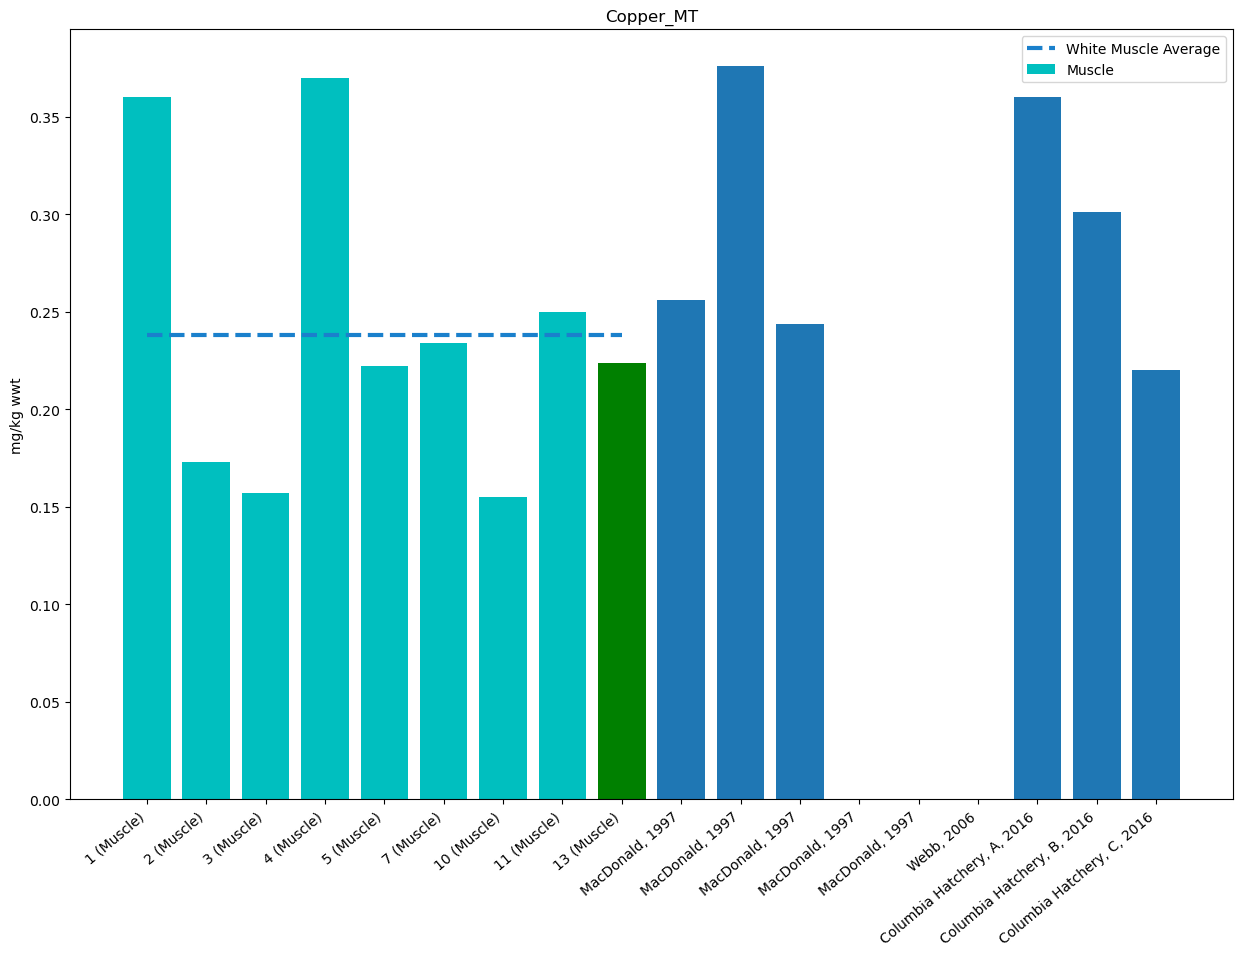

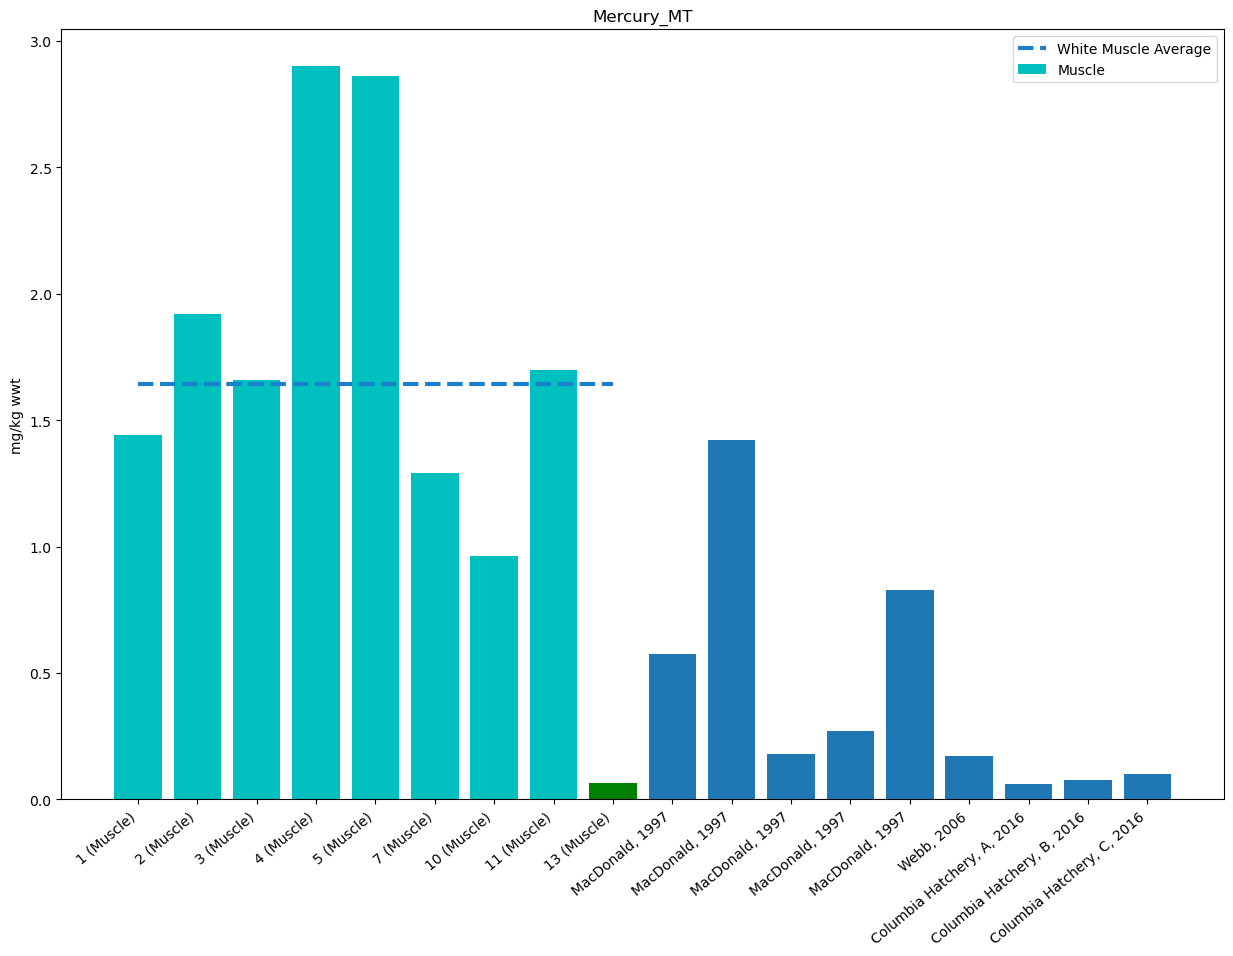

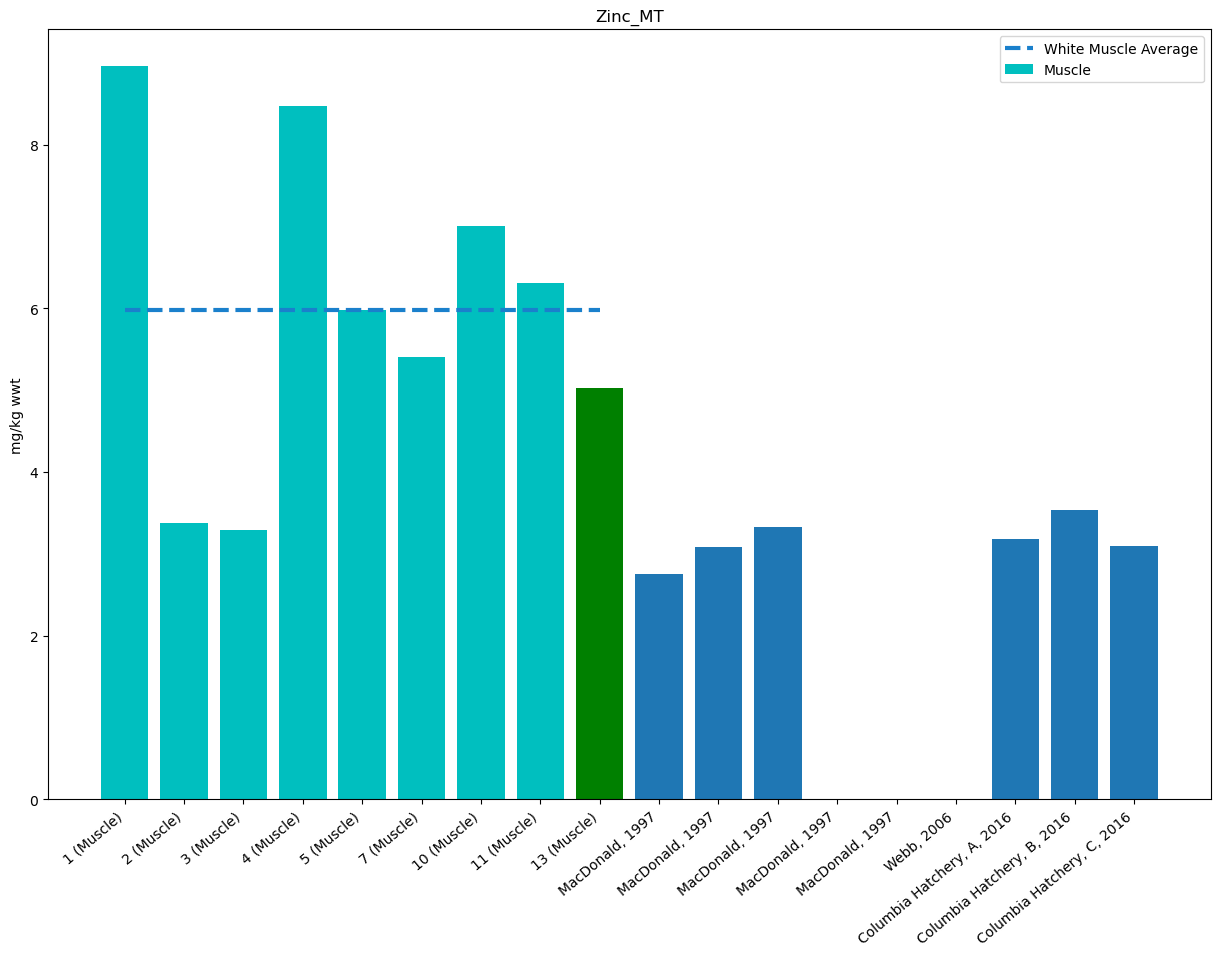

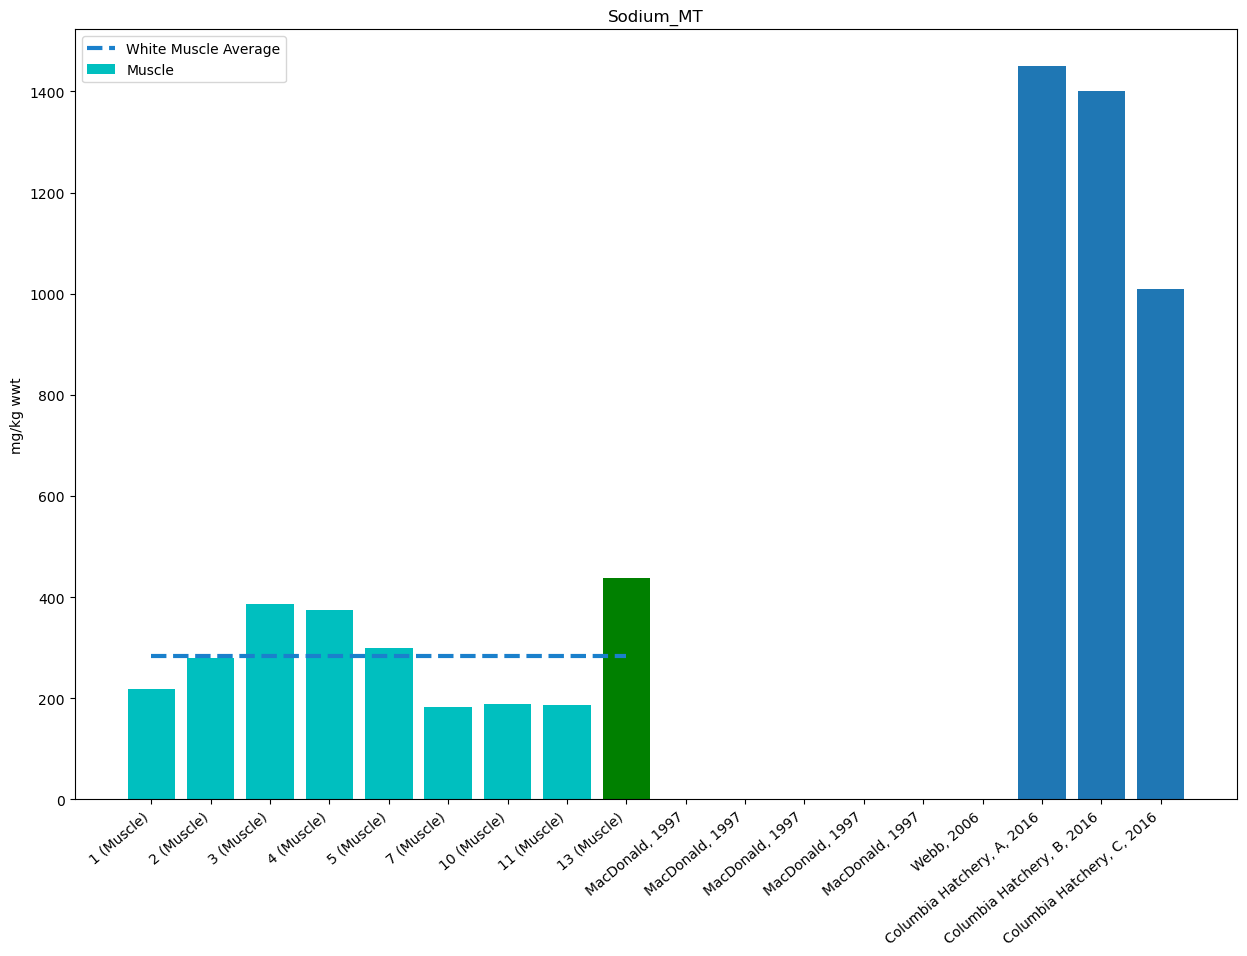

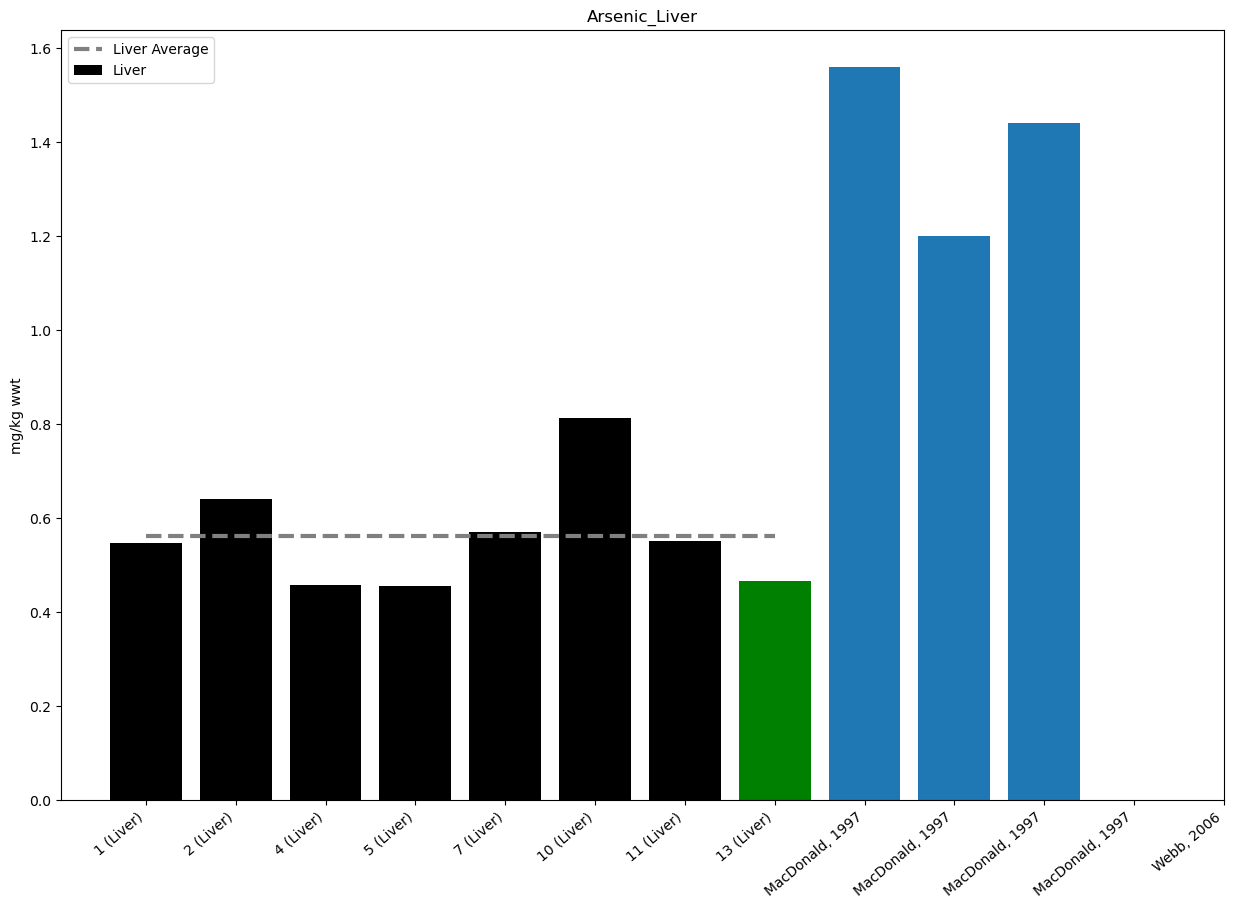

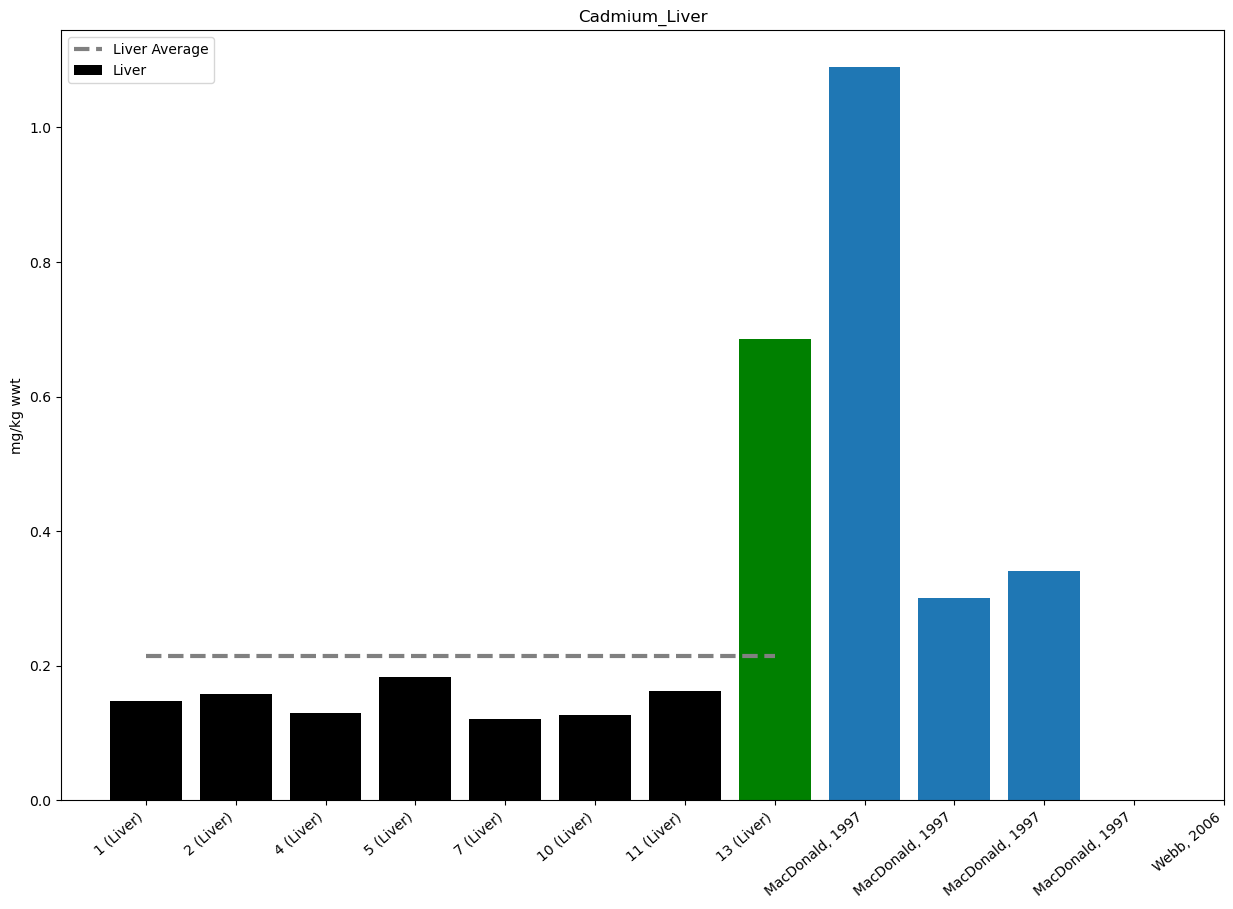

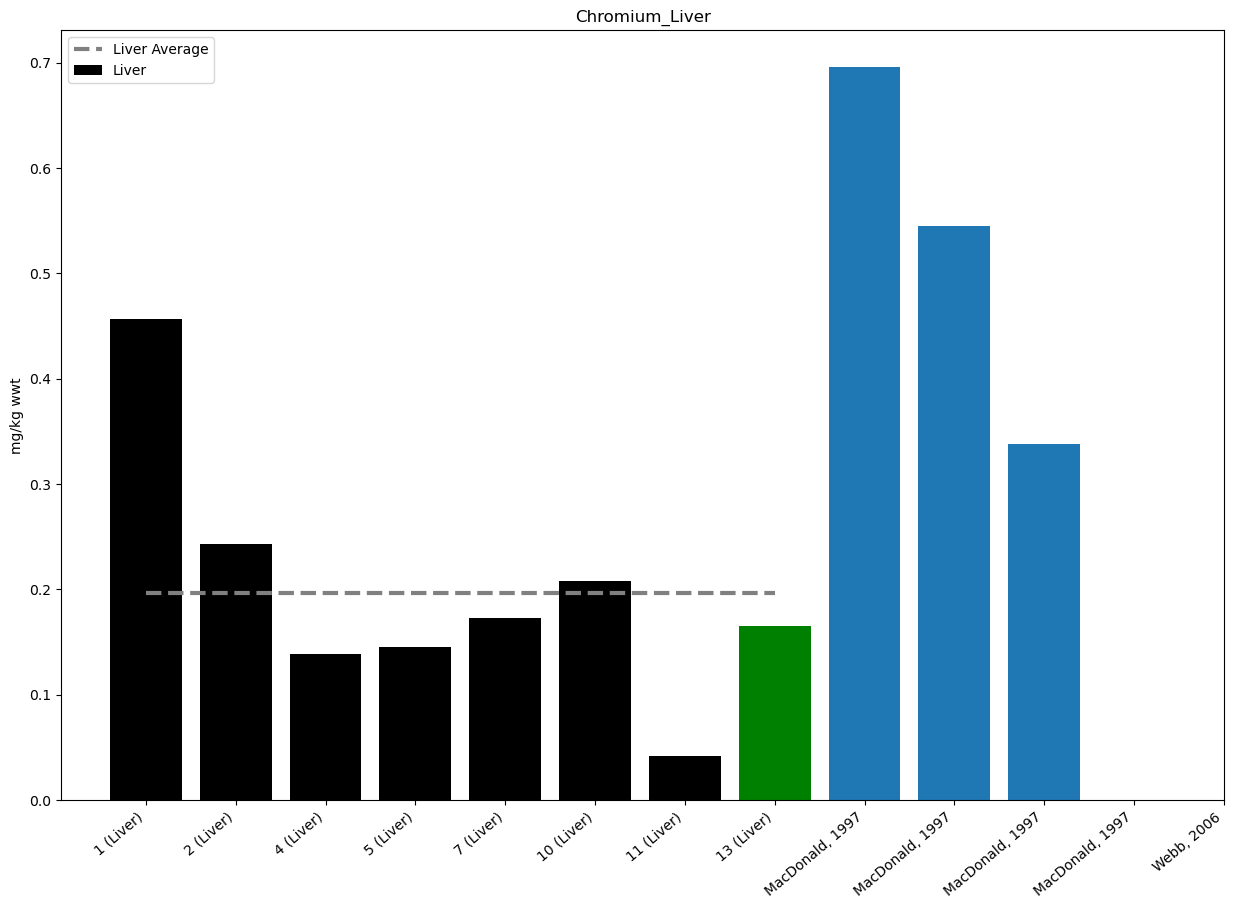

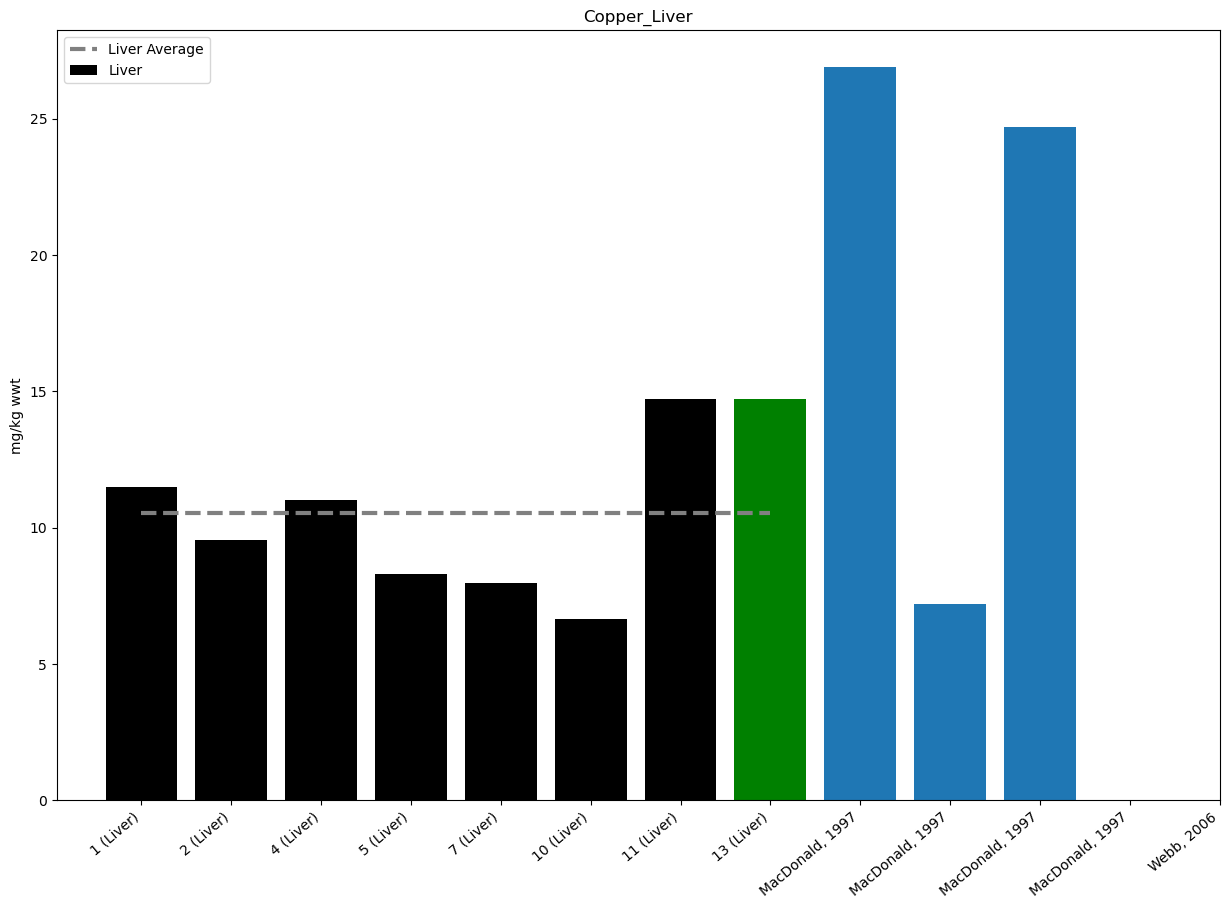

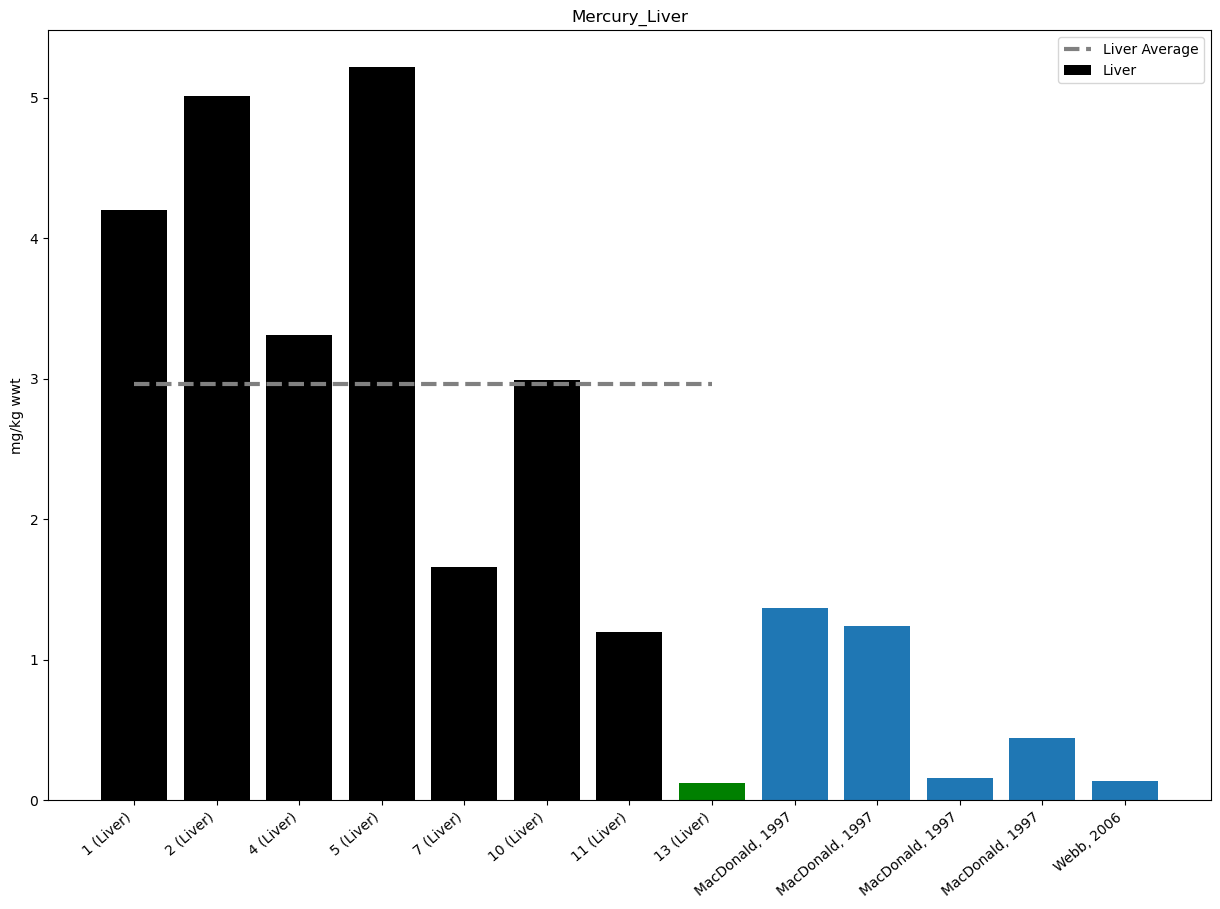

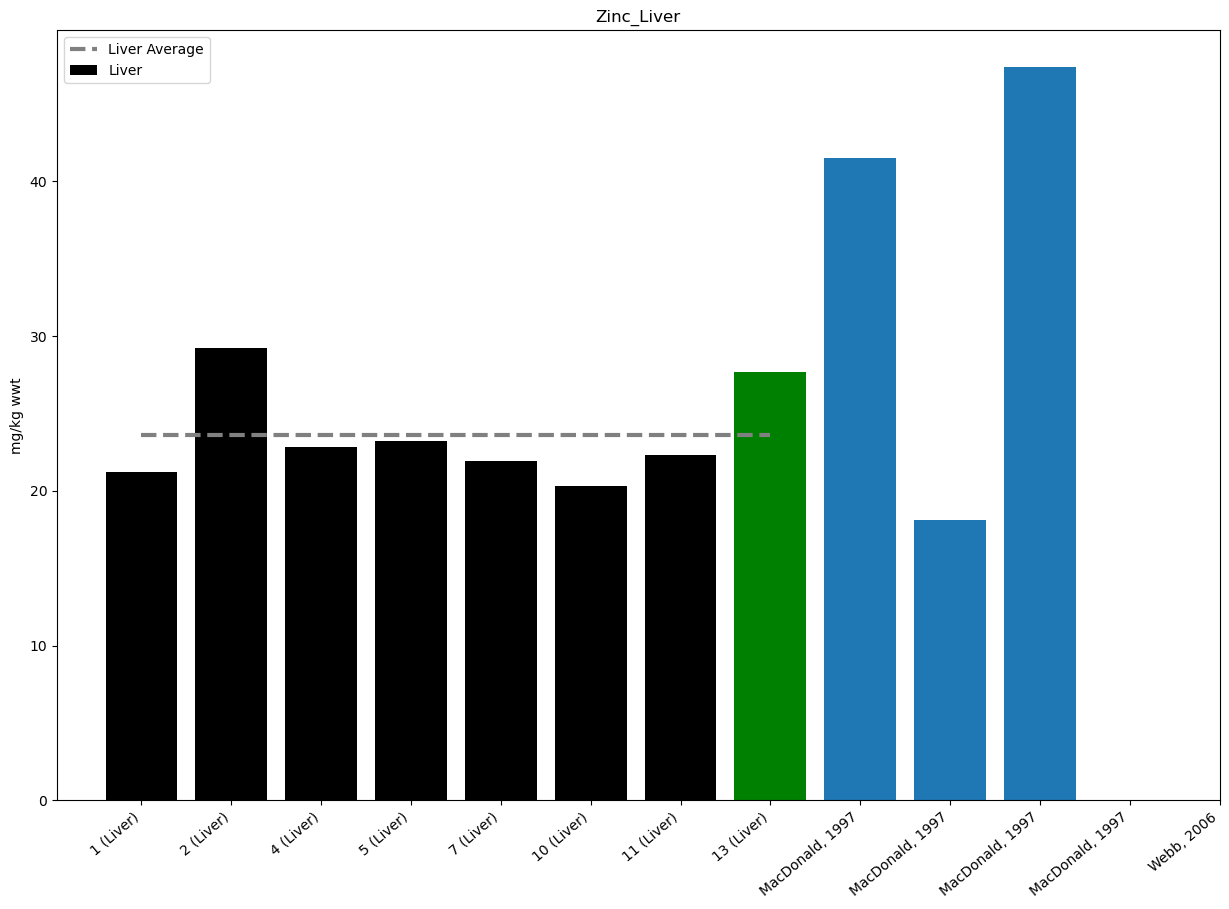

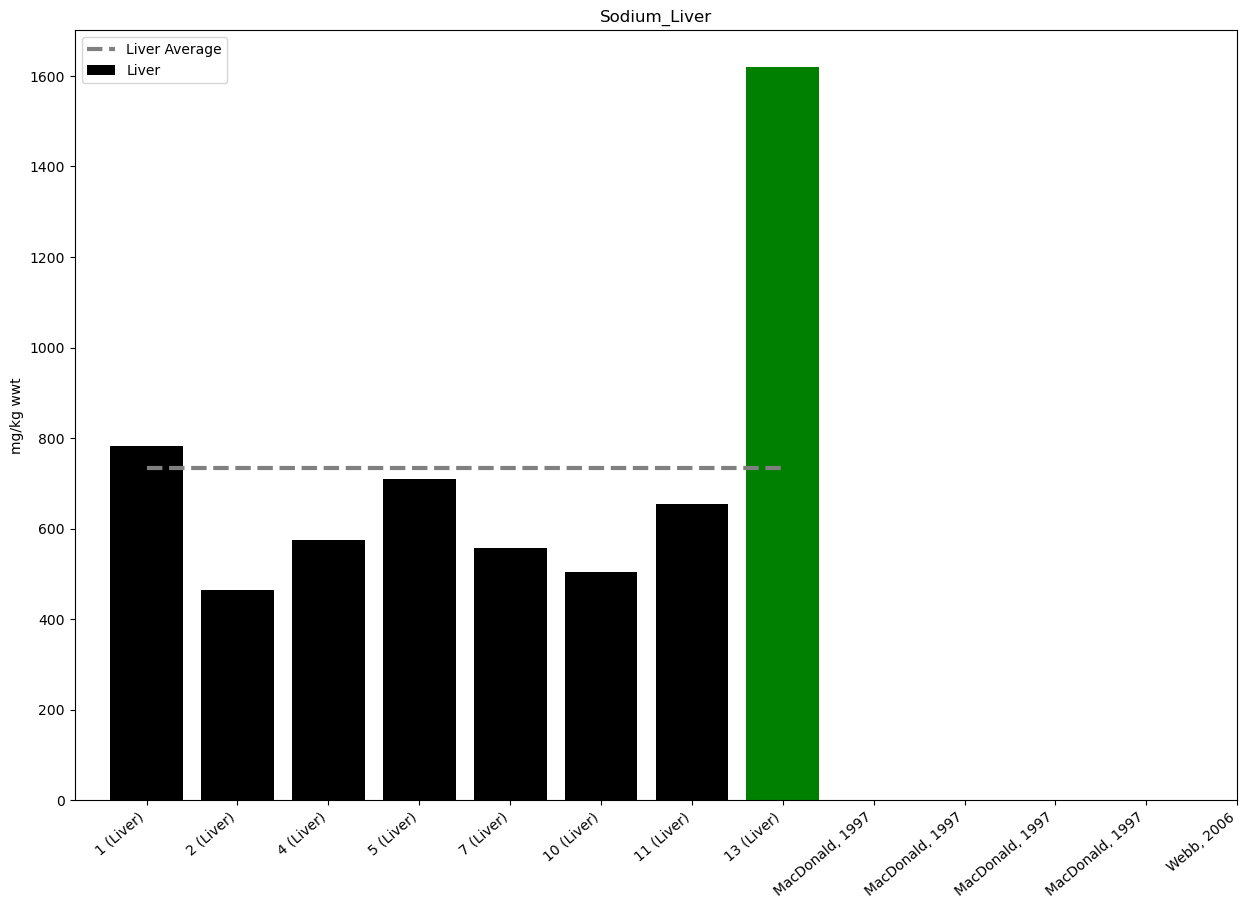

In [24]:
# elements = ["Aluminum", "Zinc", "Mercury"]
## to plot all elements uncomment bellow
elements = ref.columns[3:]

# to save the picture of an element figure, set the corrosponding value to True
# save_pic = [False, False, True]

## to save all uncomment below
save_pic = np.ones(len(elements), dtype="bool")


x = data.columns[3:]
# seperating liver and mt using columns contatins the word "Liver"
Liver_id = x.str.contains("Liver")
id_13 = x.str.contains("#13")
colorl = x.to_numpy().copy()
colorl[Liver_id] = 'k'
colorl[~Liver_id] = 'c'
colorl[id_13] = 'g'
ticklabel = x.str.removeprefix('White Sturgeon (WS #')
ticklabel = ticklabel.str.replace(')','')
ticklabel = ticklabel.str.replace('MT','(Muscle)') 
ticklabel = ticklabel.str.replace('Liver','(Liver)') 
for tissue in ['MT', 'Liver']:
    for i in np.arange(len(elements)):
        # creating figure
        fig, ax = plt.subplots(figsize=(15, 10))
        fig.set_facecolor("white")
        # obtaining related data
        values = np.array(data[np.logical_and(data["Analyte"] == elements[i], data["Units"] == "mg/kg wwt")].to_numpy()[:, 3:].ravel(), dtype=float)
        # bar ploting mt
        if tissue == 'MT':
            temp = x[(~Liver_id)]
            ax.bar(np.arange(len(temp)), values[(~Liver_id)], color = colorl[~Liver_id], label="Muscle")
            ax.plot(x[(~Liver_id)], np.mean(values[(~Liver_id)]) * np.ones(x[(~Liver_id)].shape), color = [0.1, 0.5, 0.8], label = "White Muscle Average", linestyle = "dashed", linewidth = 3)
            ax.bar(np.arange(len(temp), len(temp)+len(ref.loc[ref["Tissue"] == tissue, 'Fish'].to_numpy('str'))), ref.loc[ref["Tissue"] == tissue, elements[i]].to_numpy('float'))
            ax.xaxis.set_ticks(np.arange(len(x[~Liver_id])+len(ref.loc[ref["Tissue"] == tissue, 'Fish'])))
            ax.xaxis.set_ticklabels(list(ticklabel[~Liver_id]) + ref.loc[ref["Tissue"] == tissue, 'Fish'].to_list(), rotation = 40, ha = "right")
        # bar ploting liver
        else:
            temp = x[(Liver_id)]
            ax.bar(np.arange(len(temp)), values[Liver_id], color = colorl[Liver_id], label="Liver")
            ax.plot(x[Liver_id], np.mean(values[Liver_id]) * np.ones(x[Liver_id].shape), color = "gray", label = "Liver Average", linestyle = "dashed", linewidth = 3)
            ax.bar(np.arange(len(temp), len(temp) + len(ref.loc[ref["Tissue"] == tissue, 'Fish'].to_numpy('str'))), ref.loc[ref["Tissue"] == tissue, elements[i]].to_numpy('float'))
            ax.xaxis.set_ticks(np.arange(len(x[Liver_id])+len(ref.loc[ref["Tissue"] == tissue, 'Fish'])))
            ax.xaxis.set_ticklabels(list(ticklabel[Liver_id])  + ref.loc[ref["Tissue"] == tissue, 'Fish'].to_list(), rotation = 40, ha = "right")
        # setting axis side names
        ax.set_xlabel("")
        ax.set_ylabel("mg/kg wwt")
        ax.set_title(elements[i]+'_'+tissue)
        # setting xticks and xtick labels
        # enabling legend
        ax.legend()
        if not os.path.exists("./pics/plot+13/"):
            os.makedirs("./pics/plot+13/")
        if save_pic[i] == True:
            fig.savefig("./pics/plot+13/"+elements[i]+'_'+tissue+".png")